Create a model for predicting the burned area of for a forest fire using primarily meteorological data. 

### Notes

* This is a regresion task. 
* Data link: http://archive.ics.uci.edu/ml/datasets/Forest+Fires 
* Papers using this data: http://www.dsi.uminho.pt/~pcortez/fires.pdf 
* Steps: 
    1. Download the data 
    2. Visualise the data 
    3. (If needed) clean, normalise, transform and visualise the data to get a feeling about potential relationships between the variables
    4. Try to find the most relevant features (feature selection)
    5. Try to create new features, i.e. transform variables, for example you could transform the area using ln(x + 1)
    6. Agree on a metric (i.e. RMSE)
    6. Develop a regression model (start with simple models and then grow in complexity)
    7. Analyse the results for train + test data and compare different models

In [2]:
import pandas as pd

data = pd.read_csv('forestfires.csv', sep = ';')

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
data.shape

(517, 13)

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

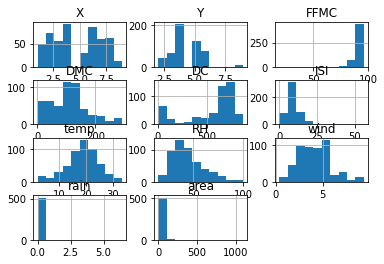

In [5]:
data.hist()

In [6]:
data.describe

<bound method NDFrame.describe of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [7]:
data.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp

list_1 = list(data.columns)
categ_list = []
for i in list_1:
    if data[i].dtype == 'object':
        categ_list.append(i)

le = LabelEncoder()
for i in categ_list:
    data[i] = le.fit_transform(data[i])

data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [9]:
data.head()
data.columns



Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [10]:
import numpy as np

# u_area = np.log(data['area'] + 1)
data['u_area'] = np.log(data['area'] + 1)
# data['area'] = np.log(data['area'] + 1)


data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,u_area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Reduced Skewness of Area Distribution'),
 Text(0.5, 0, 'U_Area'),
 Text(0, 0.5, 'Density')]

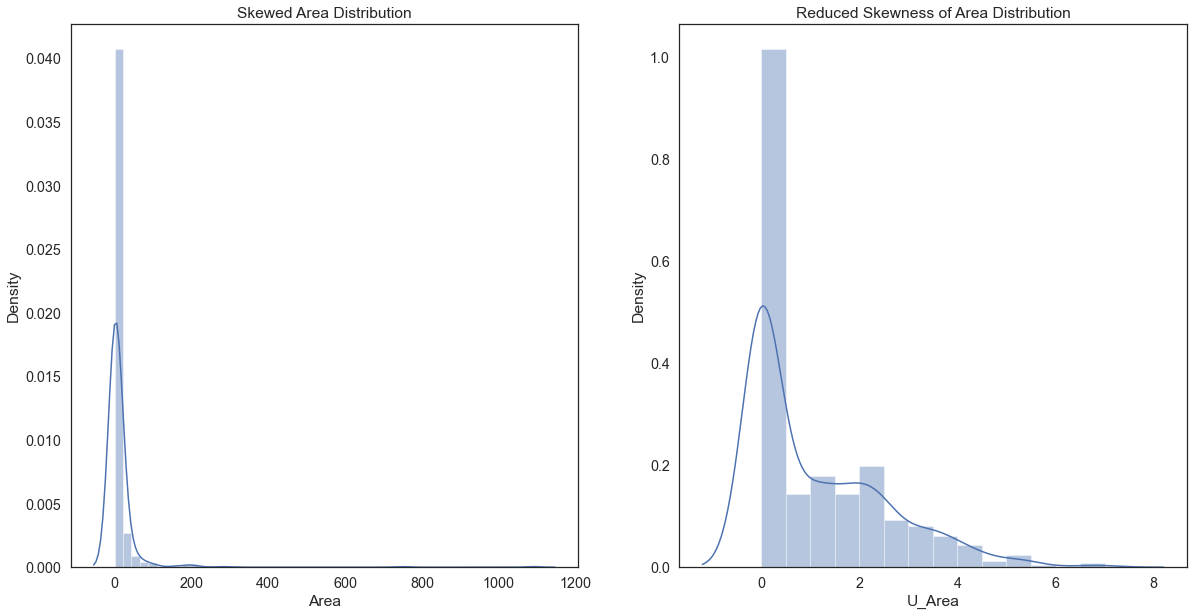

In [11]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(data['area'], ax = ax[0]);
area_dist_2 = sns.distplot(data['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density")

In [14]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

x = data.values
data.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'Area', 'U_area']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

df = pd.DataFrame(x_scaled, columns = data.columns)
df.drop(columns = 'U_area', inplace = True)
df.drop(columns = 'Area', inplace = True)

df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [15]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.233331e-16,2.491023e-16,-4.874674e-17,5.110891e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,-1.317959e+00,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02
25%,-7.221360e-01,-2.440010e-01,-1.089076e+00,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02
50%,-2.895238e-01,-2.440010e-01,5.533922e-02,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02
75%,1.008313e+00,5.698604e-01,1.199754e+00,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02
max,1.873537e+00,3.825306e+00,1.199754e+00,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01


In [16]:
%matplotlib inline
import plotly.express as px

for col in df.columns:
    fig = px.box(df[col], y = col)
    fig.show()

In [17]:
cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

def rem_out(col,df):
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    return df[(df[col] >= low_limit) & (df[col] <= high_limit)]

for col in cols:
    df = rem_out(col,df)

df.describe

<bound method NDFrame.describe of             X         Y     month       day      FFMC       DMC        DC  \
1    1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
2    1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
5    1.440925  1.383722 -1.089076  0.136781  0.300161 -0.399665 -0.241863   
6    1.440925  1.383722 -1.089076 -0.903154  0.300161 -0.343401 -0.211197   
8    1.440925  1.383722  1.199754  1.176715  0.064430  0.291128  0.583715   
..        ...       ...       ...       ...       ...       ...       ...   
503 -1.154748 -0.244001 -1.089076  1.696682  0.699090  0.445853  0.569593   
504 -0.289524 -1.057862 -1.089076  1.696682  0.699090  0.445853  0.569593   
507 -1.154748 -0.244001 -1.089076 -1.423121  0.064430  0.875644  0.825821   
510  0.575701  0.569860 -1.089076 -1.423121  0.064430  0.875644  0.825821   
515 -1.587360 -0.244001 -1.089076 -0.383187  0.680957  0.549003  0.269382   

          ISI      temp        RH      wi

In [18]:
for col in df.columns:
    fig = px.box(df[col], y = col)
    fig.show()

<AxesSubplot:>

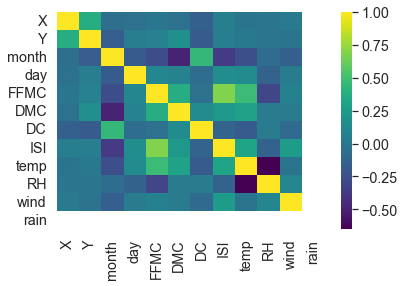

In [19]:
sns.heatmap(df.corr(), cmap = 'viridis')

In [24]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, Ridge, ElasticNet
from sklearn import model_selection, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = data['U_area']
features = data.drop(['Area', 'U_area'], axis = 1)
# features = data.drop(columns = 'Area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)


Train data set size :  (413, 12)
Test data set size :  (104, 12)


In [25]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,11,2,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,11,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,1,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,1,5,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,3,3,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0


In [34]:
y_train.head()

329    1.465568
173    1.403643
272    1.408545
497    2.752386
182    1.998774
Name: U_area, dtype: float64

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))

MSE:  2.2058735754090075
r2 score:  -0.00364536288189532


In [27]:
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

poly_pred = model_2.predict(poly_X_test)

print('MSE: ', mean_squared_error(y_test, poly_pred))
print('r2 score: ', r2_score(y_test, poly_pred))

MSE:  4446.184878444756
r2 score:  -2021.9594685358506


In [28]:
model_3 = Lasso(alpha = 100, max_iter = 10000)
model_3.fit(X_train, y_train)

pred = model_3.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))

MSE:  2.1992238175877623
r2 score:  -0.0006198048100358733


In [29]:
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)

pred = model_4.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))

MSE:  2.2093644187582147
r2 score:  -0.005233653697396479


In [30]:
model_5 = ElasticNet()
model_5.fit(X_train, y_train)

pred = model_5.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))

MSE:  2.2172726183256097
r2 score:  -0.00883178729536982


In [31]:
from sklearn.svm import SVR

model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)

pred = model_6.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))


MSE:  8.500781962831269
r2 score:  -2.8677513040536424


In [32]:
pred = np.exp(pred -1)
pred

array([3.20437561e-01, 3.92033413e+01, 2.71084205e+00, 4.45913585e+00,
       1.28659263e-01, 4.85312084e+00, 1.40265306e+00, 1.05200537e-01,
       1.33362775e+01, 3.14622678e+00, 8.14956803e+00, 9.78297151e+00,
       1.07383553e+00, 1.68932782e+01, 1.26316287e+00, 1.79027968e+01,
       6.59654678e+01, 1.57323809e+00, 2.08397829e+00, 4.45956631e+00,
       2.63899113e+00, 1.38346864e-01, 3.15814449e+00, 1.87451177e+00,
       7.06391404e+00, 1.37047891e-01, 6.92965120e-01, 1.88590117e-01,
       1.77431412e+01, 1.47435538e+02, 4.39859995e-01, 1.69294868e+00,
       2.60813355e+01, 1.53436036e+00, 1.59109403e+00, 4.92852513e-03,
       4.58788225e+00, 2.19717424e+00, 1.34777196e+00, 2.60774337e+01,
       8.59447006e-01, 5.82853828e+00, 2.85141841e+01, 1.07301816e+00,
       3.12612337e+00, 5.68908889e-02, 4.17574165e+01, 8.95987294e-02,
       5.61754246e+00, 2.09186848e-01, 4.50142215e+00, 9.24239642e-01,
       3.32245462e-01, 1.53857780e+01, 6.85024170e-02, 6.53461072e-01,
      

In [33]:
model_7 = BayesianRidge()
model_7.fit(X_train, y_train)

model_7.predict(X_test)

print('MSE: ', mean_squared_error(y_test, pred))
print('r2 score: ', r2_score(y_test, pred))

MSE:  19706.089402369507
r2 score:  -8965.028456801765
